In [2]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [3]:
import sys
sys.path.insert(0, jaxqualin_path)

In [4]:
from Fit import *
from QuasinormalMode import *
from Waveforms import *
from ModeSelection import *
from postprocess import *
import matplotlib.pyplot as plt

2023-08-31 17:43:37.584571: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 17:43:37.625054: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 17:43:37.627548: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [5]:
from importlib import reload

In [6]:
import Waveforms
reload(Waveforms)
from Waveforms import *

In [7]:
from plot import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [8]:
ROOT_PATH = jaxqualin_path
FIT_SAVE_PATH = os.path.join(ROOT_PATH, "pickle/fits")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")
PLOT_PATH = os.path.join(PLOT_PATH_ROOT, "convergence/")

In [9]:
eff = False
eff_i = 0
delay = False

batch_runname = "0305"
runname = "convergence_test_3"
# l, m = 4, 4

N_free_list = [5, 6, 7, 8, 9, 10]

guess_num = 10

guess_num_list = list(range(guess_num))

In [10]:
if not eff:
    h_dict, _ = get_relevant_lm_waveforms_SXS(batch_runname)
    relevant_lm_list = [tuple(map(int,str.split('.'))) for str in list(h_dict.keys())]
    lm_num = len(relevant_lm_list)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


2023-08-31 17:44:25.219556: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [11]:
Mf, af = get_M_a_SXS(batch_runname)

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


In [12]:
def read_results_lm(l, m, N_free, batch_runname, runname, t0_arr, guess_num_list, qnm_fixed_list = []):
    SXS_num = batch_runname
    # runname_full = f"{SXS_num}_lm_{l}{m}_Nfree_{N_free}_{runname}"
    run_string_prefix = f"{SXS_num}_lm_{l}{m}_convergence_{runname}"

    run_string_prefixes = [f"{run_string_prefix}_{i}" for i in guess_num_list]

    fit_results = []
    for run_string_prefix in run_string_prefixes:
        try:
            fit_results.append(get_result(
        run_string_prefix, 
        t0_arr, qnm_fixed_list,
        N_free))
        except:
            pass
    
    return fit_results

In [14]:
l, m = 2, 2
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = []
N_free = 10

fit_results = read_results_lm(l, m, N_free, batch_runname, runname, t0_arr,
                              guess_num_list, qnm_fixed_list)

Text(0.5, 0.98, 'N = 10')

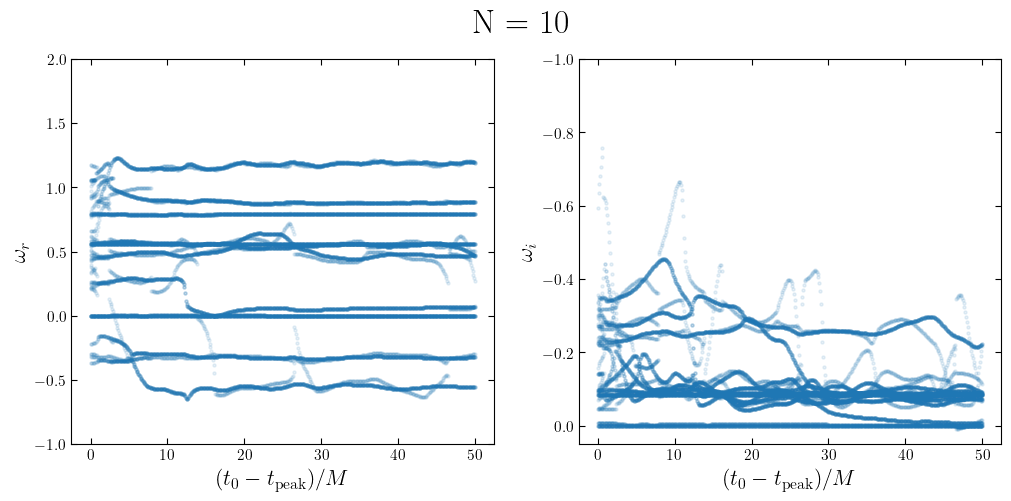

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

for j, result_full in enumerate(fit_results):
    omega_dict = result_full.omega_dict
    for i in range(N_free):
        axs[0].scatter(t0_arr,
                    omega_dict['real'][f'omega_r_free_{i}'], 
                    s = 5, c = f'C0', alpha = 0.1)
        axs[1].scatter(t0_arr, 
                    omega_dict['imag'][f'omega_i_free_{i}'], 
                    s = 5, c = f'C0', alpha = 0.1)
axs[0].set_ylim(-1, 2)
axs[1].set_ylim(0.05, -1)
axs[0].set_xlabel(r"$(t_0 - t_{\rm peak})/M$", fontsize = 16)
axs[1].set_xlabel(r"$(t_0 - t_{\rm peak})/M$", fontsize = 16)
axs[0].set_ylabel(r"$\omega_r$", fontsize = 16)
axs[1].set_ylabel(r"$\omega_i$", fontsize = 16)
fig.suptitle(f"N = {N_free}", fontsize = 24)

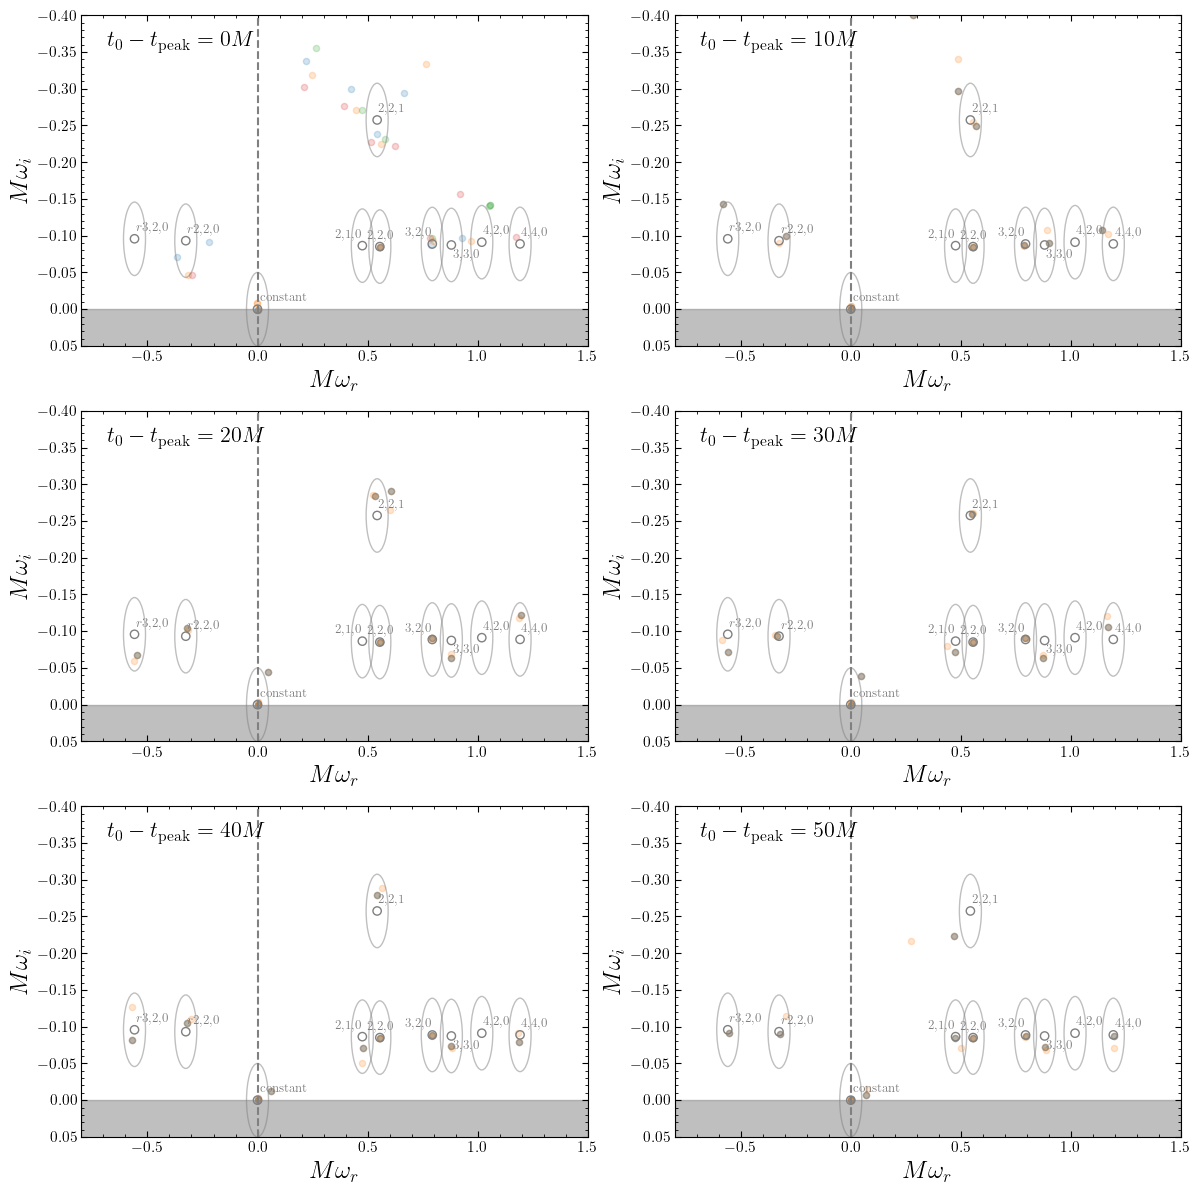

In [20]:
t_plots = np.linspace(0, 50, num = 6)
qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1_2.2.2_2.2.3_2.2.4"
                                "_3.2.0_3.3.0_4.4.0_2.1.0"
                                "_3.-2.0_2.-2.0_4.2.0_constant", Mf, af)
# qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1_2.2.2_2.2.3_2.2.4"
#                                 "_3.2.0_constant", Mf, af)
# qnm_fixed_list = long_str_to_qnms("2.2.0_3.3.0_4.4.0_4.4.1"
#                                 "_5.5.0_2.2.0x2.2.0_5.4.0"
#                                 "_constant", Mf, af)

fig, axs = plt.subplots(3, 2, figsize = (12, 12))

for i, t_plot in enumerate(t_plots):
    ax = axs.reshape(-1)[i]
    t0_index = np.argmin(np.abs(t0_arr - t_plot))
    for j, result_full in enumerate(fit_results):
        omega_dict = result_full.omega_dict
        A_dict = result_full.A_dict
        for i in range(N_free):
            ax.scatter(omega_dict['real'][f'omega_r_free_{i}'][t0_index], 
                        omega_dict['imag'][f'omega_i_free_{i}'][t0_index],
                        s = 20, c = f'C{j}', alpha = 0.2)
    ax.text(0.05, 0.95, r'$t_0 - t_{\rm peak} =' + f'{int(t_plot)} M$', fontsize = 16, color = 'k',
            horizontalalignment='left', verticalalignment='top',
            transform=ax.transAxes)
    # ax.set_xlim(-0.1, 1.6)
    ax.set_xlim(-0.8, 1.5)
    ax.set_ylim(0.05, -0.4)
    plot_predicted_qnms(ax, qnm_fixed_list, change_lim = False, ellipse_facecolor= 'none', 
                        expand_points = (1.1, 1.7),
                        label_offset = (0., 0.)
                        )
fig.tight_layout()

fig.savefig(os.path.join(PLOT_PATH, f"omega_vs_t_lm_{l}{m}.png"), dpi = 300)
fig.savefig(os.path.join(PLOT_PATH, f"omega_vs_t_lm_{l}{m}.pdf"), bbox_inches = "tight")

In [22]:
def mismatch_hist_plot(fit_results, ax = None, labels = True):
    if ax is None:
        _, ax = plt.subplots()
    mismatch_all = []
    for j, result_full in enumerate(fit_results):
        mismatch = result_full.mismatch_arr
        mismatch_all.append(mismatch[0])
    mismatch_all = np.array(mismatch_all)
    suc_num = len(mismatch_all[mismatch_all < 1.001*np.nanmin(mismatch_all)])

    ax.hist(mismatch_all, bins = 100)
    if labels:
        ax.set_title(f'Success: {suc_num}/{guess_num}', fontsize = 20)
        ax.set_xlabel('Mismatch', fontsize = 16)
        ax.set_ylabel('count', fontsize = 16)

def mismatch_all_plot(fit_results, ax = None, labels = True, alpha = 0.5,
                      color = None):
    if ax is None:
        _, ax = plt.subplots()
    for result_full in fit_results:
        mismatch = result_full.mismatch_arr
        ax.semilogy(t0_arr, mismatch, alpha = alpha, c = color)
    if labels:
        ax.set_xlabel(r'$(t_0 - t_{\rm peak}) / M$', fontsize = 16)
        ax.set_ylabel(r'$\mathcal{M}$', fontsize = 16)

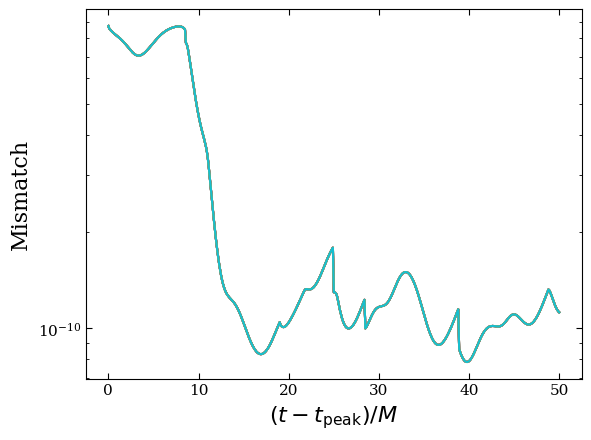

In [9]:
mismatch_all_plot(fit_results)

In [13]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = []
N_free_list = [5, 6, 7, 8, 9, 10]

l, m = 2, 2
N_free = 5
t0_mis = t0_arr[::5]

res_mismatches = estimate_resolution_mismatch(batch_runname, l, m, t0s = t0_mis)


Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev5/metadata.json


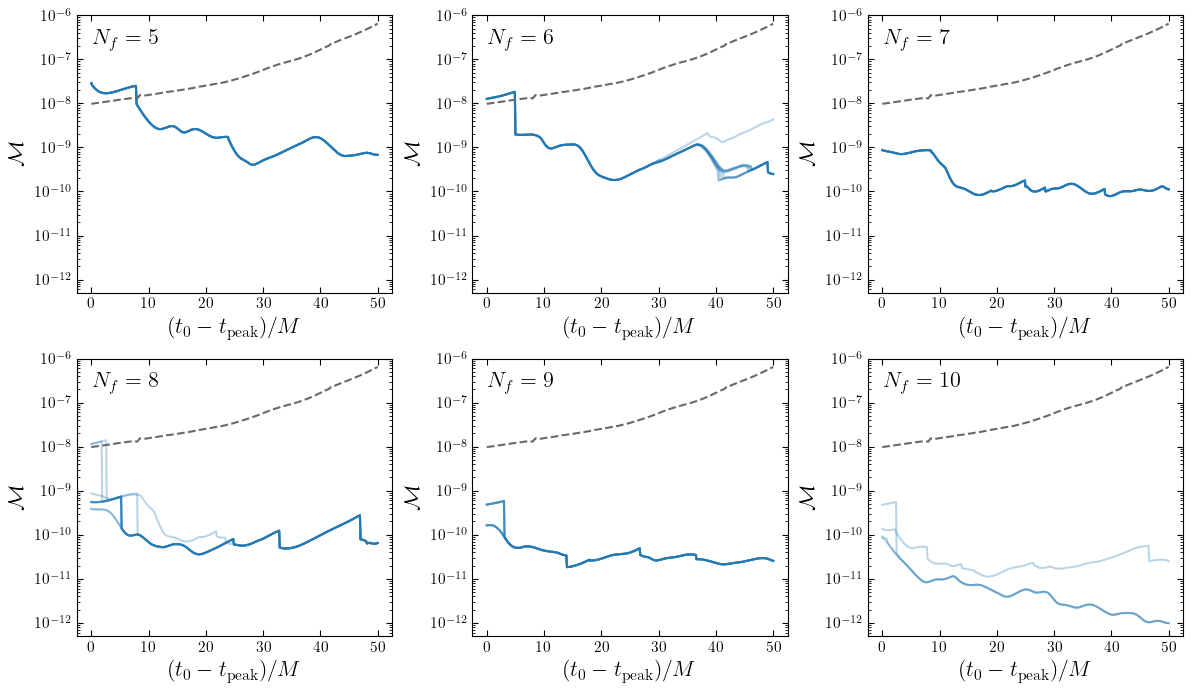

: 

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (12, 7))
axs = axs.reshape(-1)

for i, N_free in enumerate(N_free_list):
    fit_results = read_results_lm(l, m, N_free, batch_runname, runname, t0_arr,
                                        guess_num_list, qnm_fixed_list)
    # mismatch_hist_plot(fit_results, ax = axs[i])
    mismatch_all_plot(fit_results, ax = axs[i], color = "C0", alpha = 0.3)
    axs[i].semilogy(t0_mis, res_mismatches, c = 'dimgray', ls = '--')
    # add text in each axis to show N_free on top left corner
    axs[i].text(0.05, 0.95, f"$N_f = {N_free}$", transform = axs[i].transAxes,
                va = 'top', ha = 'left', fontsize = 16)
    axs[i].set_ylim(5e-13, 1e-6)

# add title for whole figure showing SXS_num and l m 
# fig.suptitle(f"SXS{batch_runname}, l = {l}, m = {m}", fontsize = 20)

fig.tight_layout()

# save figure to plot path
fig.savefig(os.path.join(PLOT_PATH, f"convergence_compare_lm_{l}{m}.png"), dpi = 300)
fig.savefig(os.path.join(PLOT_PATH, f"convergence_compare_lm_{l}{m}.pdf"), bbox_inches = "tight")

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following

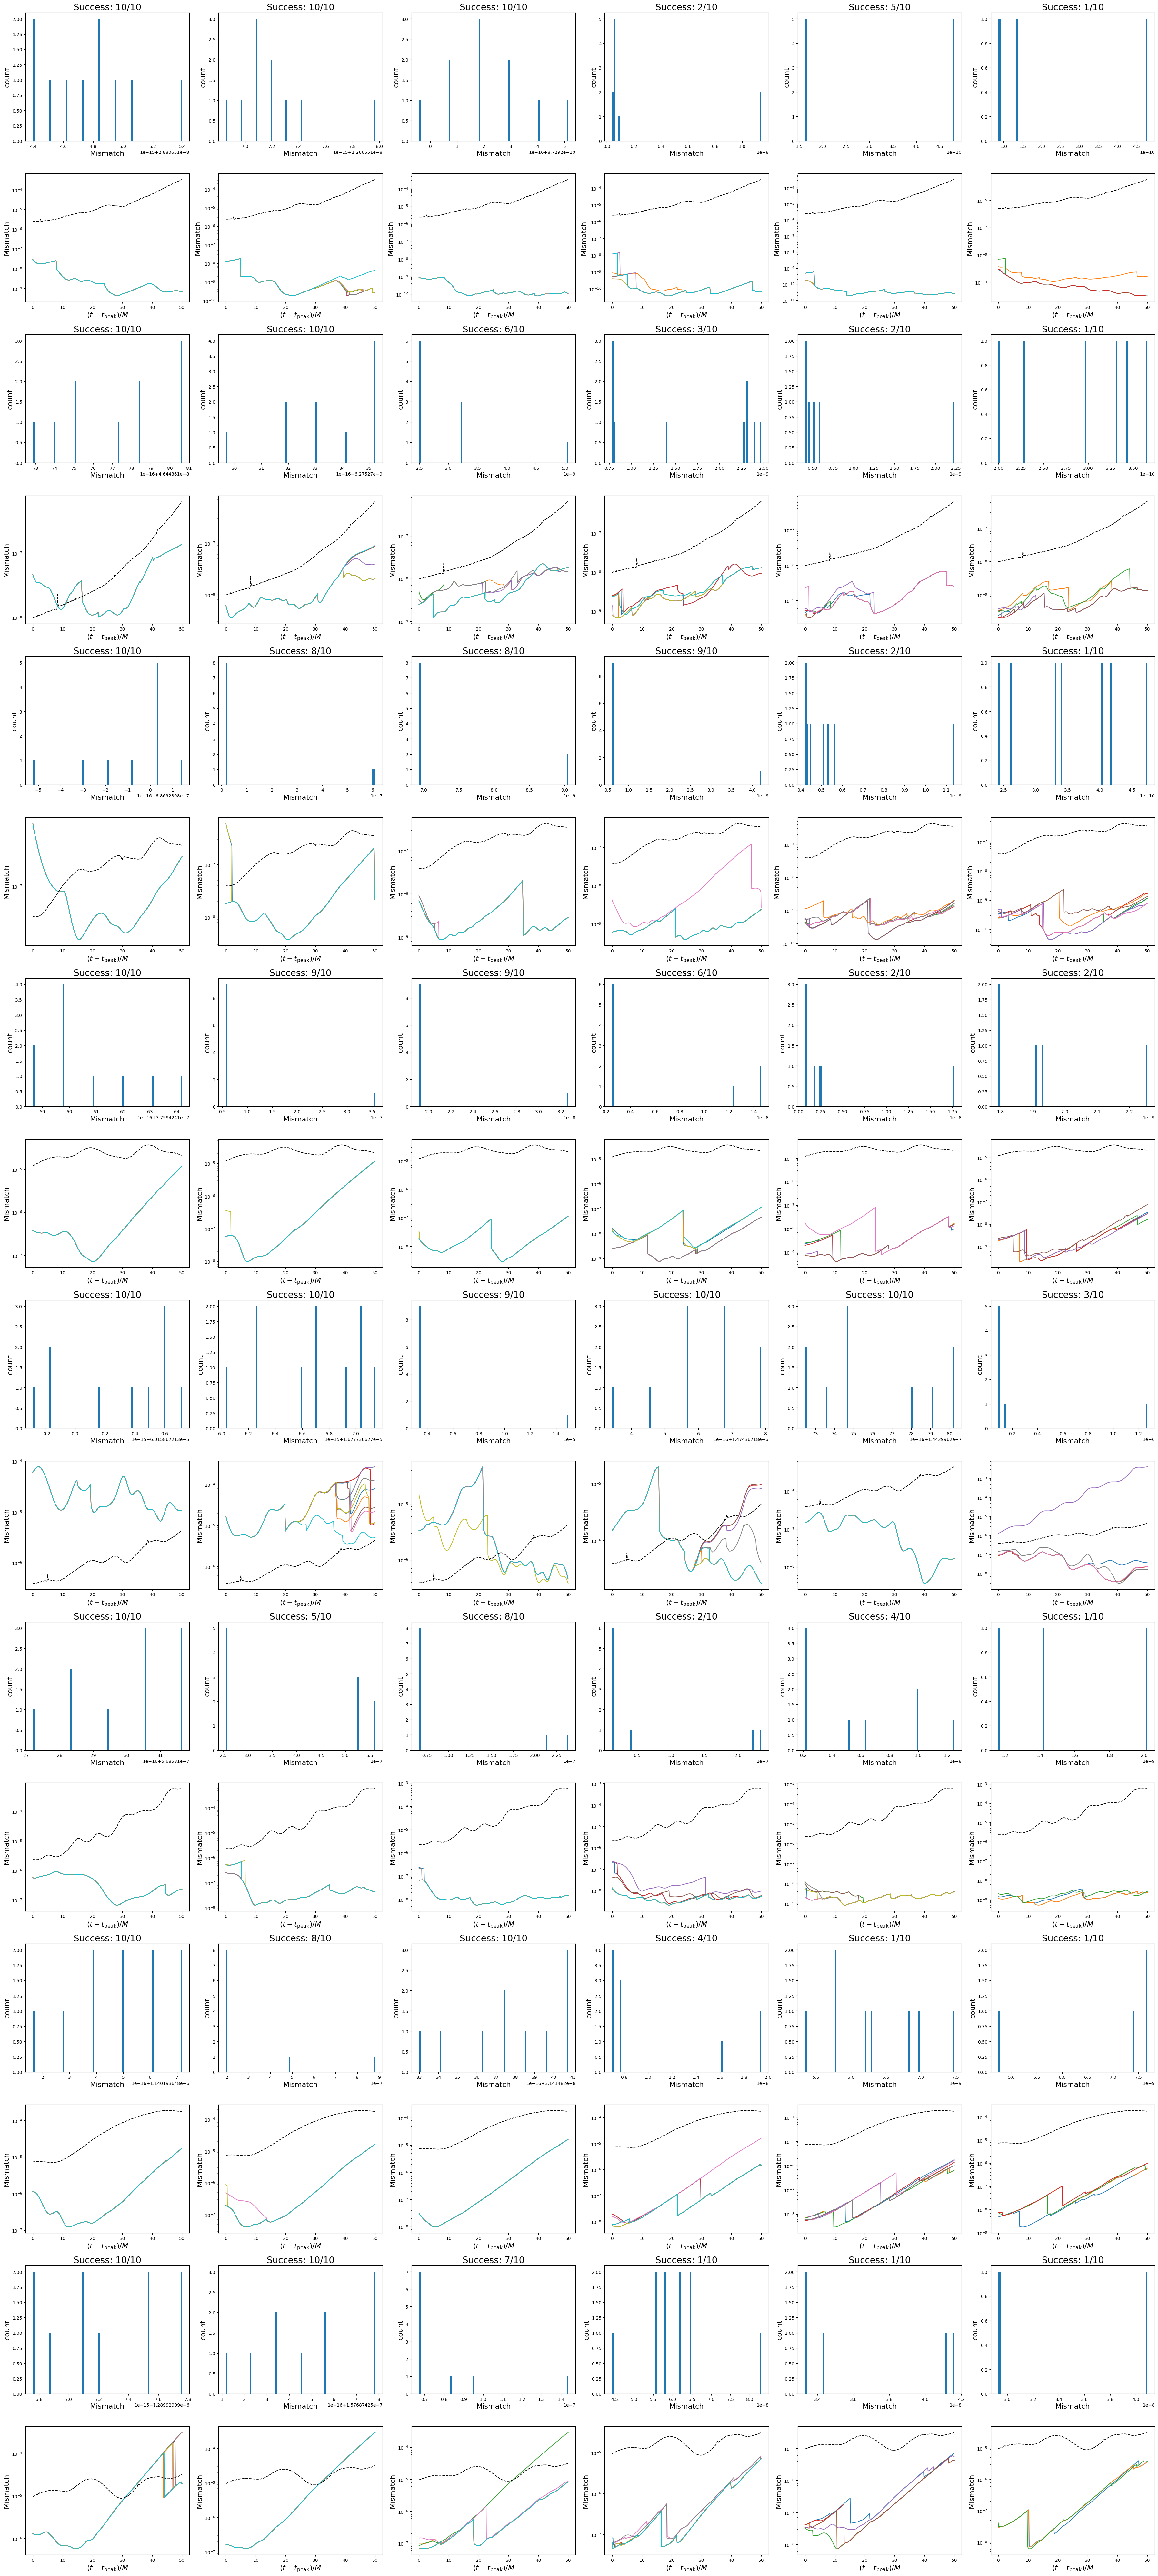

: 

In [10]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = []
N_free_list = [5, 6, 7, 8, 9, 10]

fig, axs = plt.subplots(lm_num*2, len(N_free_list), figsize = (6*len(N_free_list), 10*lm_num))

for i, lm in enumerate(relevant_lm_list):
    l, m = lm
    res_mismatches = estimate_resolution_mismatch(batch_runname, l, m, t0s = t0_arr)
    for j, N_free in enumerate(N_free_list):
        try:
            fit_results = read_results_lm(l, m, N_free, batch_runname, runname, t0_arr,
                                        guess_num_list, qnm_fixed_list)
            mismatch_hist_plot(fit_results, ax = axs[2*i, j])
            mismatch_all_plot(fit_results, ax = axs[2*i + 1, j])
            axs[2*i + 1, j].semilogy(t0_arr, res_mismatches, c = 'k', ls = '--')
        except:
            pass

fig.tight_layout()

In [11]:
for i, lm in enumerate(relevant_lm_list):
    # res_mismatches = estimate_resolution_mismatch(batch_runname, l, m, t0s = t0_arr)
    for j, N_free in enumerate(N_free_list):
        try:
            l, m = lm
            fit_results = read_results_lm(l, m, N_free, batch_runname, runname, t0_arr,
                                        guess_num_list, qnm_fixed_list)
            print(l, m, N_free)
            for result in fit_results:
                print(np.count_nonzero(np.isnan(result.mismatch_arr)))
        except:
            pass

2 2 5
0
0
0
0
0
0
0
0
0
0
2 2 6
0
0
0
0
0
0
0
0
0
0
2 2 7
0
0
0
0
0
2 2 8
0
3
0
0
0
0
0
0
0
0
2 2 9
1
0
0
0
3
0
0
1
1
0
2 2 10
0
0
0
39
1
0
0
0
1
1
3 2 5
0
0
0
0
0
0
0
0
0
0
3 2 6
0
0
0
0
0
0
0
0
0
0
3 2 7
0
0
0
0
0
0
0
1
0
3 2 8
6
0
3
0
5
36
3
8
0
0
3 2 9
17
0
4
6
7
0
26
0
7
1
3 2 10
21
4
9
0
38
16
5
47
14
0
3 3 5
0
0
0
0
0
0
0
0
0
0
3 3 6
0
0
0
0
0
0
0
0
0
0
3 3 7
0
0
0
0
0
0
0
0
3 3 8
1
0
3
0
1
3
1
3
0
0
3 3 9
0
1
0
0
6
0
0
1
10
1
3 3 10
1
37
31
44
27
15
6
0
16
35
4 4 5
0
0
0
0
0
0
0
0
0
0
4 4 6
0
0
0
0
0
0
0
0
0
0
4 4 7
0
0
0
0
0
0
4 4 8
11
0
9
25
23
14
12
10
17
6
4 4 9
0
1
20
17
22
40
40
38
1
33
4 4 10
17
6
10
11
13
5
1
15
4
20
2 1 5
0
0
0
0
0
0
0
0
0
0
2 1 6
0
0
0
0
0
0
0
0
0
0
2 1 7
0
0
0
0
0
0
0
0
0
2 1 8
0
0
0
0
0
0
0
0
0
0
2 1 9
0
0
0
0
0
2
0
0
1
3
2 1 10
0
2
3
1
1
0
3
6
1
3
